# Customer churn analysis

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#reading the data
df = pd.read_csv('telecom_users.csv',na_values=' ')

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [4]:
df.shape

(5986, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [6]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5976.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,404.312500
50%,3546.500000,0.000000,29.000000,70.400000,1412.150000
75%,5291.750000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [7]:
#checking count of null values
df.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [8]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features: ', len(categorical_feature))
print('Categorical features : ',categorical_feature)
print('\n')
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical features: ', len(numerical_feature))
print('Numerical Features : ',numerical_feature)

Number of categorical features:  17
Categorical features :  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Number of numerical features:  5
Numerical Features :  ['Unnamed: 0', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Text(0.5, 1.0, 'Count of churner & non-churner in data')

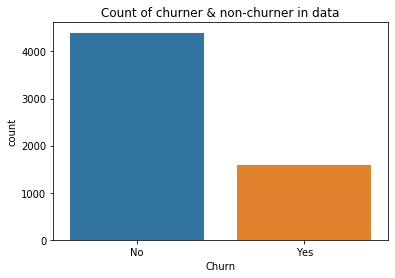

In [9]:
sns.countplot(x = 'Churn', data = df)
plt.title('Count of churner & non-churner in data')

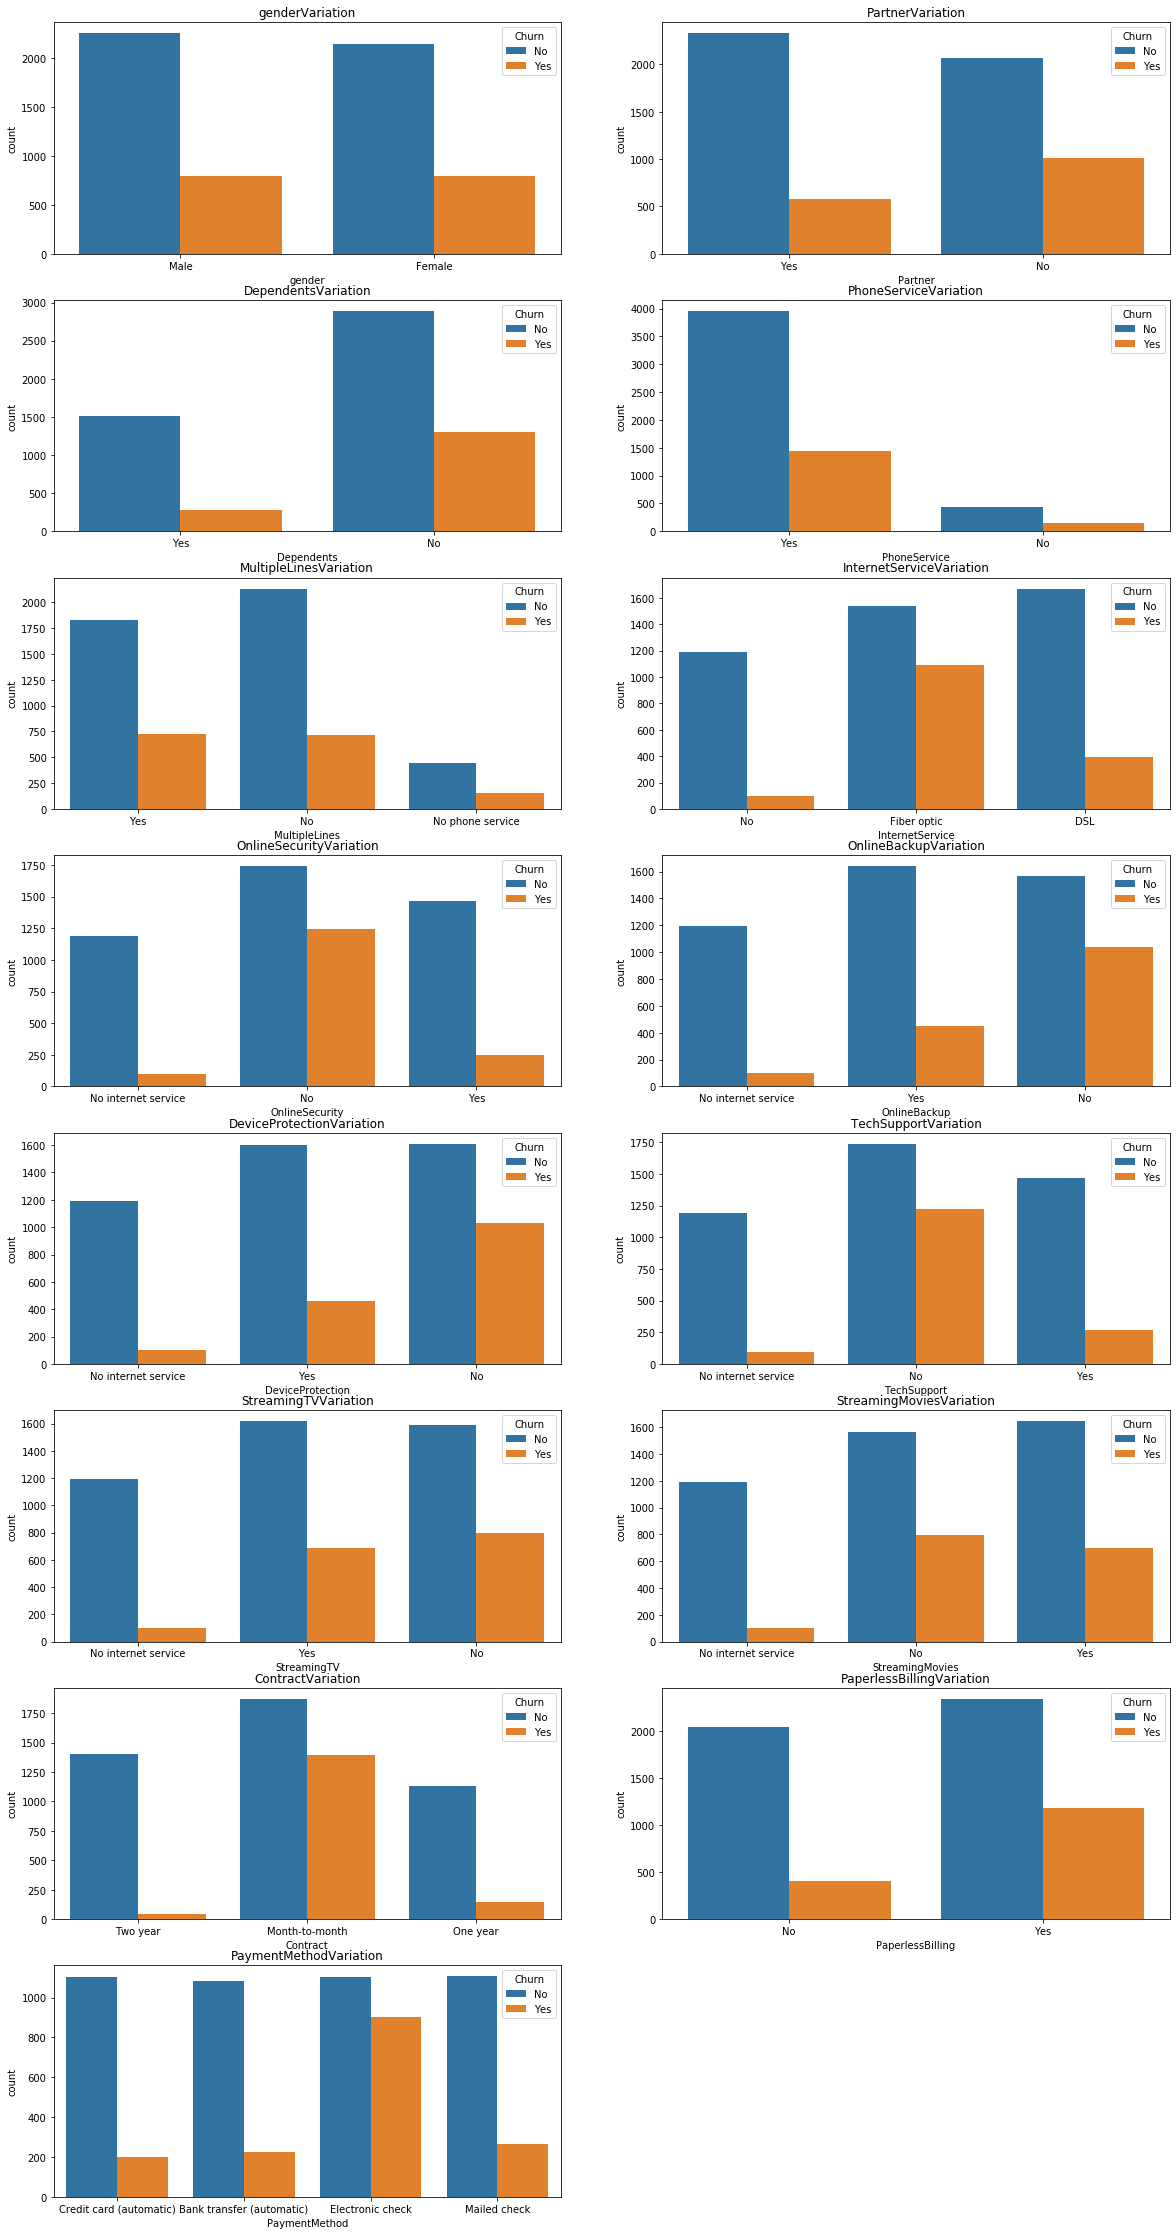

In [10]:
plt.figure(figsize= (20,40))
cat_feature = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
               'Contract', 'PaperlessBilling', 'PaymentMethod'] 

i=1
for col in cat_feature:
    plt.subplot(8,2,i)
    sns.countplot(x= col, hue='Churn', data=df)
    plt.title(col + 'Variation')
    i=i+1

**Data Pre-processing**

In [11]:
data = df.copy()

In [12]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [13]:
#dropping unnecessary columns
data =  data.drop(['Unnamed: 0','customerID'], axis =1)

In [14]:
# As count of null values is very less, hence dropping rows that have null values
data = data.dropna(axis = 0)
data.shape

(5976, 20)

In [15]:
#dropping duplicate data from dataset
data = data.drop_duplicates()
data.shape

(5960, 20)

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


Encoding the categorical variables

In [17]:
code = {'Male':1,
         'Female':0,
         'Yes':1,
         'No':0,
         'No internet service':0,
         'No phone service':0}

In [18]:
#columns that need to map with code values
Encoding_cols =  ['gender', 'Partner', 'Dependents',
                  'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling','Churn']

In [19]:
#mapping with numerical value
for col in data[Encoding_cols].columns:
        data.loc[:,col] = data[col].map(code)

In [20]:
#columns that need to be dummy encoded
dummy = ['InternetService','Contract', 'PaymentMethod']

In [21]:
#dummy encoding
data = pd.get_dummies(data, columns = dummy, drop_first = True)

In [22]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,72,1,1,0,0,0,...,24.10,1734.65,0,0,1,0,1,1,0,0
1,0,0,0,0,44,1,0,0,1,1,...,88.15,3973.20,0,1,0,0,0,1,0,0
2,0,1,1,0,38,1,1,0,0,0,...,74.95,2869.85,1,1,0,0,0,0,0,0
3,1,0,0,0,4,1,0,0,0,0,...,55.90,238.50,0,0,0,0,0,0,1,0
4,1,0,0,0,2,1,0,1,0,1,...,53.45,119.50,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,0,0,...,95.00,95.00,1,1,0,0,0,0,1,0
5982,0,0,1,1,23,1,1,1,1,1,...,91.10,2198.30,0,0,0,0,1,1,0,0
5983,1,0,1,1,12,1,0,0,0,0,...,21.15,306.05,0,0,1,0,0,0,1,0
5984,1,1,0,0,12,1,1,0,0,1,...,99.45,1200.15,1,1,0,0,0,0,1,0


In [23]:
data.shape

(5960, 24)

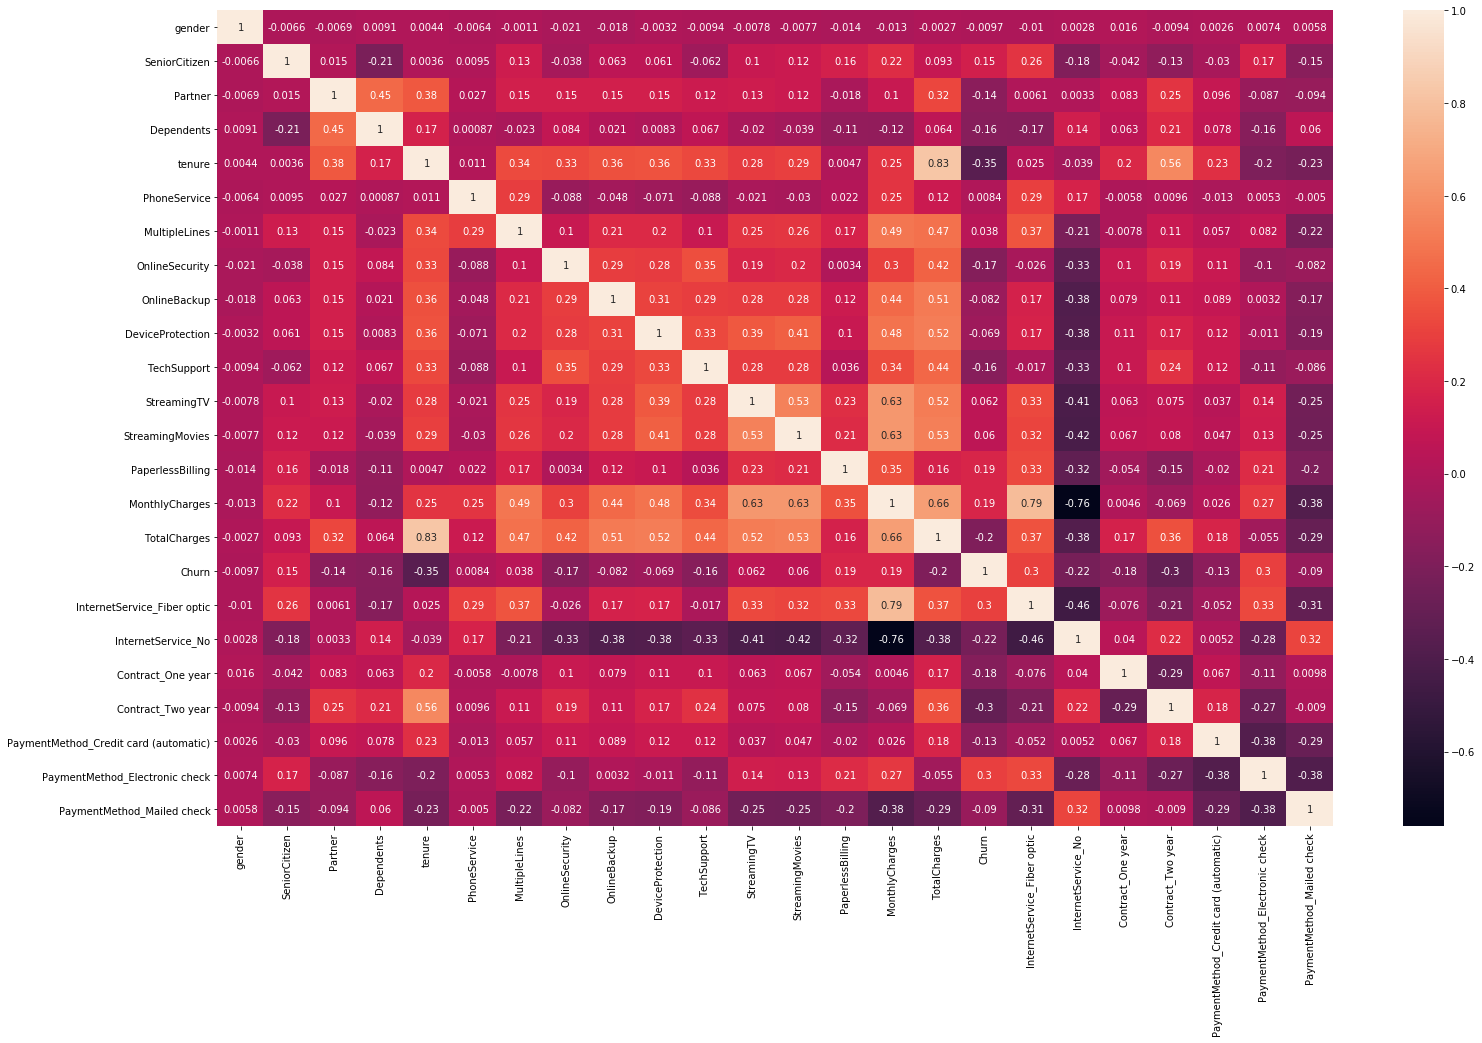

In [24]:
#plotting the heatmap to check correlation 
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot = True)
plt.show()

Feature selection

In [25]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

feature_Scores = pd.concat([columns,scores],axis=1)
feature_Scores.columns = ['feature','Score'] 
print(feature_Scores.nlargest(23,'Score'))#printing score for all 23 features

                                  feature          Score
15                           TotalCharges  515037.238076
4                                  tenure   13357.846386
14                         MonthlyCharges    2919.546962
19                      Contract_Two year     409.761685
21         PaymentMethod_Electronic check     346.939152
16            InternetService_Fiber optic     301.528987
17                     InternetService_No     235.140067
18                      Contract_One year     144.531628
7                          OnlineSecurity     127.853077
1                           SeniorCitizen     112.996259
10                            TechSupport     109.703685
3                              Dependents     104.439506
13                       PaperlessBilling      86.576146
20  PaymentMethod_Credit card (automatic)      84.720292
2                                 Partner      64.246415
22             PaymentMethod_Mailed check      37.638018
8                            On

We observed that gender, Multiplelines, PhoneService has very low score, hence dropping these columns and selecting the remaining best 20 features.

In [28]:
X = X.drop(['gender','PhoneService','MultipleLines'], axis =1)

Diving data into training and testing set.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(4172, 20) (4172,)
(1788, 20) (1788,)


As data is highly imbalance, balancing the data with SMOTE.

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

In [32]:
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape, y_res.shape

((6056, 20), (6056,))

Scaling the numerical features

In [33]:
numerical_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
X_train_num = X_res[numerical_col]
X_test_num = X_test[numerical_col]
X_train_cat = X_res.drop(numerical_col, axis =1)
X_test_cat = X_test.drop(numerical_col, axis =1)

In [35]:
X_train_num = X_train_num.reset_index(drop=True)
X_test_num = X_test_num.reset_index(drop=True)
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

In [36]:
#saving the numerical columns into csv file
#X_train_num.to_csv('E:/End to end project/Telecom Churn Prediction/num_data.csv', index = False)

In [37]:
X_train_num.shape, X_train_cat.shape, X_test_num.shape, X_test_cat.shape

((6056, 3), (6056, 17), (1788, 3), (1788, 17))

In [38]:
from sklearn import preprocessing

In [39]:
scaler = preprocessing.MinMaxScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [41]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns.tolist())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns.tolist())

In [42]:
X_train = pd.concat([X_train_scaled,X_train_cat], axis = 1)
X_test = pd.concat([X_test_scaled,X_test_cat], axis = 1)

In [43]:
X_train.shape, X_test.shape

((6056, 20), (1788, 20))

In [44]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.042254,0.069154,0.009658,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.478873,0.307960,0.194190,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0
2,0.690141,0.757711,0.564978,0,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0
3,0.112676,0.721891,0.091270,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0
4,0.338028,0.612935,0.230389,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0


In [45]:
X_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

**Model building**

In [46]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, auc
from sklearn.metrics import confusion_matrix

In [47]:
#function that train the model and after that evaluating it.
accuracy = {}
recall = {}
precision = {}
f_score = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(X_train, y_res)
    pred = model.predict(X_test)
    
    # Confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    
    prec = precision_score(y_test, pred)*100
    precision[model_name] = prec
    print('precision_score',prec)
    
    rec = recall_score(y_test, pred)*100
    recall[model_name] = rec
    print('recall_score',rec)
    
    f_sco = metrics.f1_score(y_test, pred)*100
    f_score[model_name] = f_sco
    print('f1_score',f_sco)
    
    #ROC plot
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    auc_roc = auc(fpr,tpr)*100   
    plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % auc_roc)
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

Logistic Regression
confusion_matrix
      0    1
0  1048  307
1   118  315
accuracy_score 76.23042505592841
precision_score 50.64308681672026
recall_score 72.74826789838336
f1_score 59.71563981042654


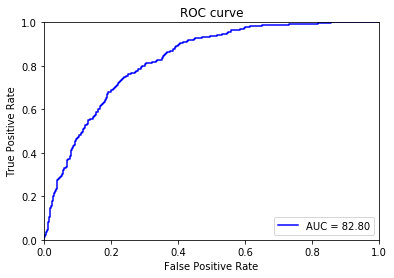

In [49]:
logreg = LogisticRegression(random_state = 42)
train_model(logreg, 'Logistic Regression')

Decision Tree
confusion_matrix
      0    1
0  1046  309
1   204  229
accuracy_score 71.30872483221476
precision_score 42.56505576208178
recall_score 52.88683602771363
f1_score 47.16786817713697


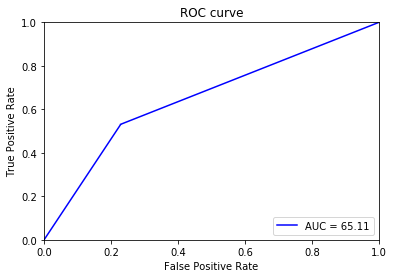

In [50]:
dt = DecisionTreeClassifier(random_state=42)
train_model(dt, 'Decision Tree')

Random Forest
confusion_matrix
      0    1
0  1146  209
1   175  258
accuracy_score 78.52348993288591
precision_score 55.24625267665952
recall_score 59.58429561200924
f1_score 57.333333333333336


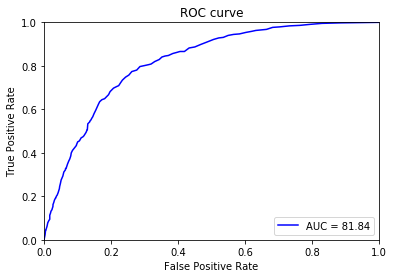

In [51]:
rf = RandomForestClassifier(random_state=42)
train_model(rf, 'Random Forest')

SVM
confusion_matrix
      0    1
0  1091  264
1   140  293
accuracy_score 77.40492170022371
precision_score 52.6032315978456
recall_score 67.6674364896074
f1_score 59.1919191919192


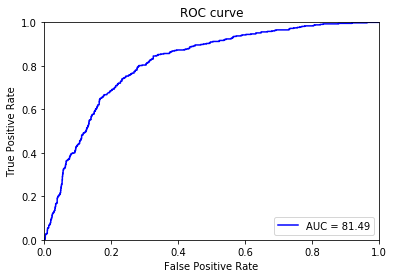

In [52]:
SVM = svm.SVC(probability=True)
train_model(SVM, 'SVM')

KNN
confusion_matrix
      0    1
0  1011  344
1   134  299
accuracy_score 73.2662192393736
precision_score 46.500777604976676
recall_score 69.05311778290994
f1_score 55.57620817843867


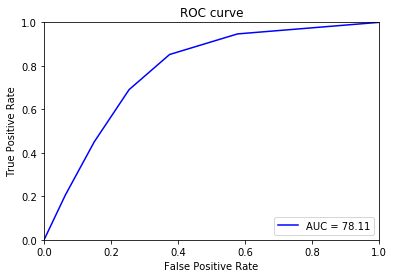

In [53]:
knn = KNeighborsClassifier()
train_model(knn, 'KNN')

Naive_Bayes
confusion_matrix
      0    1
0  1042  313
1   119  314
accuracy_score 75.83892617449665
precision_score 50.079744816586924
recall_score 72.51732101616628
f1_score 59.24528301886792


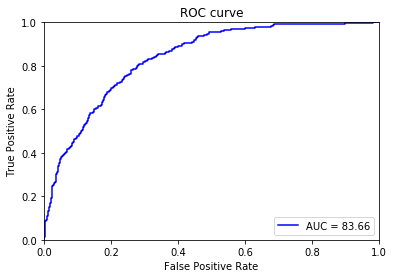

In [54]:
NaiveB = GaussianNB()
train_model(NaiveB,'Naive_Bayes')

Cross-validation

In [55]:
score_lr=cross_val_score(estimator=logreg,X=X_train,y=y_res,cv=10)
acc_lr = score_lr.mean()*100
print('Logistic-regression accuracy after cross-validation',acc_lr)

score_dt=cross_val_score(estimator=dt,X=X_train,y=y_res,cv=10)
acc_dt = score_dt.mean()*100
print('Decision Tree accuracy after cross-validation',acc_dt)
      
score_rf=cross_val_score(estimator=rf,X=X_train,y=y_res,cv=10)
acc_rf = score_rf.mean()*100
print('Random Forest accuracy after cross-validation',acc_rf)

score_svm=cross_val_score(estimator=SVM,X=X_train,y=y_res,cv=10)
acc_svm = score_svm.mean()*100
print('SVM accuracy after cross-validation',acc_svm)

score_knn=cross_val_score(estimator=knn,X=X_train,y=y_res,cv=10)
acc_knn = score_knn.mean()*100
print('KNN accuracy after cross-validation',acc_knn)
      
score_nb=cross_val_score(estimator=NaiveB,X=X_train,y=y_res,cv=10)
acc_nb = score_nb.mean()*100
print('Naive Bayes accuracy after cross-validation',acc_nb)

Logistic-regression accuracy after cross-validation 80.22104028584677
Decision Tree accuracy after cross-validation 78.40525870768896
Random Forest accuracy after cross-validation 83.47464746474648
SVM accuracy after cross-validation 80.76611297493386
KNN accuracy after cross-validation 79.70899817254453
Naive Bayes accuracy after cross-validation 78.83345607288001


Hyper-parameter tuning 

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
from scipy.stats import randint

Tuning Random Forest classifier

In [58]:
random_grid={'max_depth':[5,10,15,20,25,30,35,40],
              'n_estimators':[50,100,150,200,300,400,500],
              'max_features':["auto", "sqrt", "log2"],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':[1,2,4],
             'min_samples_split':[1,2,5,10]
              }

In [59]:
def hypertuning_rscv(classifier,rd_grid,nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(classifier, param_distributions=rd_grid,
                                  n_iter=nbr_iter, random_state = 0,cv=5)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [60]:
rf_parameters, rf_ht_score = hypertuning_rscv(rf, random_grid, 10, X_train, y_res)

In [61]:
rf_parameters

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25,
 'criterion': 'gini',
 'bootstrap': True}

In [62]:
rf_ht_score

0.8251490054042563

Tuned Random Forest
confusion_matrix
      0    1
0  1127  228
1   164  269
accuracy_score 78.07606263982103
precision_score 54.12474849094567
recall_score 62.12471131639723
f1_score 57.849462365591386


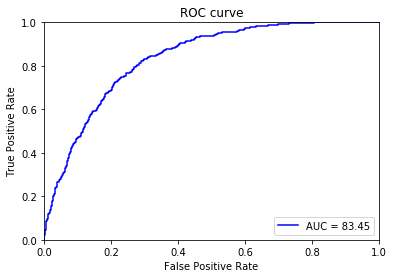

In [63]:
rf_classifier=RandomForestClassifier(n_estimators=300,min_samples_split=10,min_samples_leaf=1,
                                    max_features='auto',max_depth=25,criterion='gini',bootstrap=True)
train_model(rf_classifier,'Tuned Random Forest')

Tuning Support Vector Machine classifier

In [64]:
svm_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid']} 

In [65]:
grid = RandomizedSearchCV(SVM, svm_grid, refit = True, verbose = 3)
grid.fit(X_train, y_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ............C=100, gamma=0.0001, kernel=sigmoid; total time=   9.2s
[CV 2/5] END ............C=100, gamma=0.0001, kernel=sigmoid; total time=   9.8s
[CV 3/5] END ............C=100, gamma=0.0001, kernel=sigmoid; total time=  10.9s
[CV 4/5] END ............C=100, gamma=0.0001, kernel=sigmoid; total time=  10.2s
[CV 5/5] END ............C=100, gamma=0.0001, kernel=sigmoid; total time=  10.8s
[CV 1/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=   9.2s
[CV 2/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=   9.5s
[CV 3/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=  10.9s
[CV 4/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=  10.1s
[CV 5/5] END ..............C=10, gamma=0.001, kernel=sigmoid; total time=  10.4s
[CV 1/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   8.3s
[CV 2/5] END ...................C=1, gamma=0.001

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   verbose=3)

In [66]:
grid.best_params_

{'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 100}

In [67]:
grid.best_score_

0.7926135016474397

Tuned_SVM
confusion_matrix
      0    1
0  1052  303
1   113  320
accuracy_score 76.7337807606264
precision_score 51.36436597110754
recall_score 73.90300230946882
f1_score 60.606060606060595


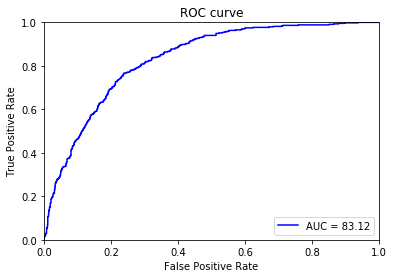

In [68]:
Tuned_SVM = svm.SVC(kernel='linear',gamma=0.01,C = 0.1 ,probability=True)
train_model(Tuned_SVM, 'Tuned_SVM')

**Model comparision**

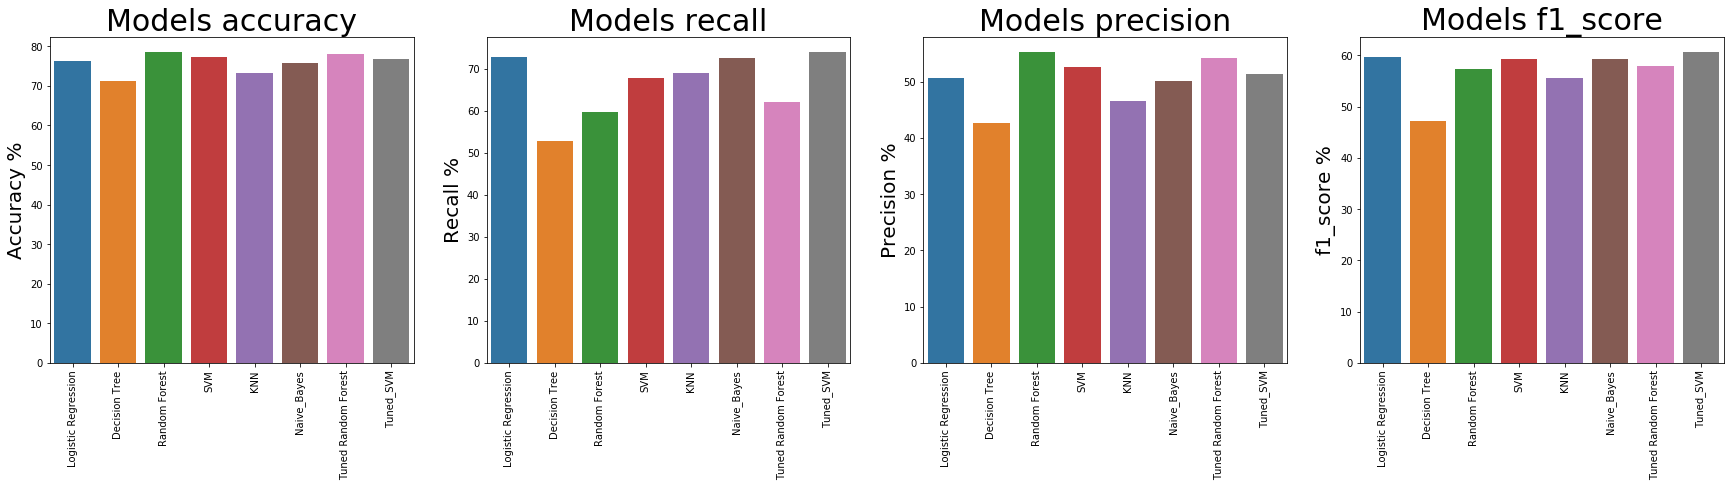

In [69]:
fig, axs=plt.subplots(1,4,figsize=(30,6))

for tick in axs[0].get_xticklabels():
    tick.set_rotation(90)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(90)
for tick in axs[2].get_xticklabels():
    tick.set_rotation(90)
for tick in axs[3].get_xticklabels():
    tick.set_rotation(90)

axs[0].set_ylabel('Accuracy %', size = 20)
axs[1].set_ylabel('Recall %', size =20)
axs[2].set_ylabel('Precision %', size =20)
axs[3].set_ylabel('f1_score %', size =20)
fig.align_ylabels()

axs[0].set_title('Models accuracy', size =30)
axs[1].set_title('Models recall', size=30)
axs[2].set_title('Models precision', size=30)
axs[3].set_title('Models f1_score', size=30)

sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), ax= axs[0])
sns.barplot(x=list(recall.keys()), y=list(recall.values()), ax = axs[1])
sns.barplot(x=list(precision.keys()), y=list(precision.values()), ax =axs[2])
sns.barplot(x=list(f_score.keys()), y=list(f_score.values()), ax =axs[3])


After analysing above plot, we observed that tuned SVM classifier gave us better performance. Hence selecting Tuned_SVM as final model. 

Now, creating pickle file of the model.

In [70]:
import pickle
# open a file, where we want to store the data
file = open('SVM.pkl', 'wb')

# dump information to that file
pickle.dump(Tuned_SVM, file)